# Decision Tree Classifier

Berikut ini merupakan implementasi algoritma Decision Tree CLassifier menggunakan library scikit-learn.

---
## Setup Library dan Dataset

In [15]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.030780,0.1705,0.05913,...,14.09,19.35,93.22,605.8,0.13260,0.2610,0.3476,0.09783,0.3006,0.07802
88,12.36,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.037450,0.1930,0.06404,...,13.83,30.50,91.46,574.7,0.13040,0.2463,0.2434,0.12050,0.2972,0.09261
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,15.51,19.97,99.66,745.3,0.08484,0.1233,0.1091,0.04537,0.2542,0.06623
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.021790,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.2187,0.1164,0.08263,0.3075,0.07351
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.025940,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.13450,0.2118,0.1797,0.06918,0.2329,0.08134


---
## Preprocessing and Pipelining

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

---
## Create model

In [17]:
from sklearn import tree
# Define model
model = tree.DecisionTreeClassifier()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

---
## Fitting and predict

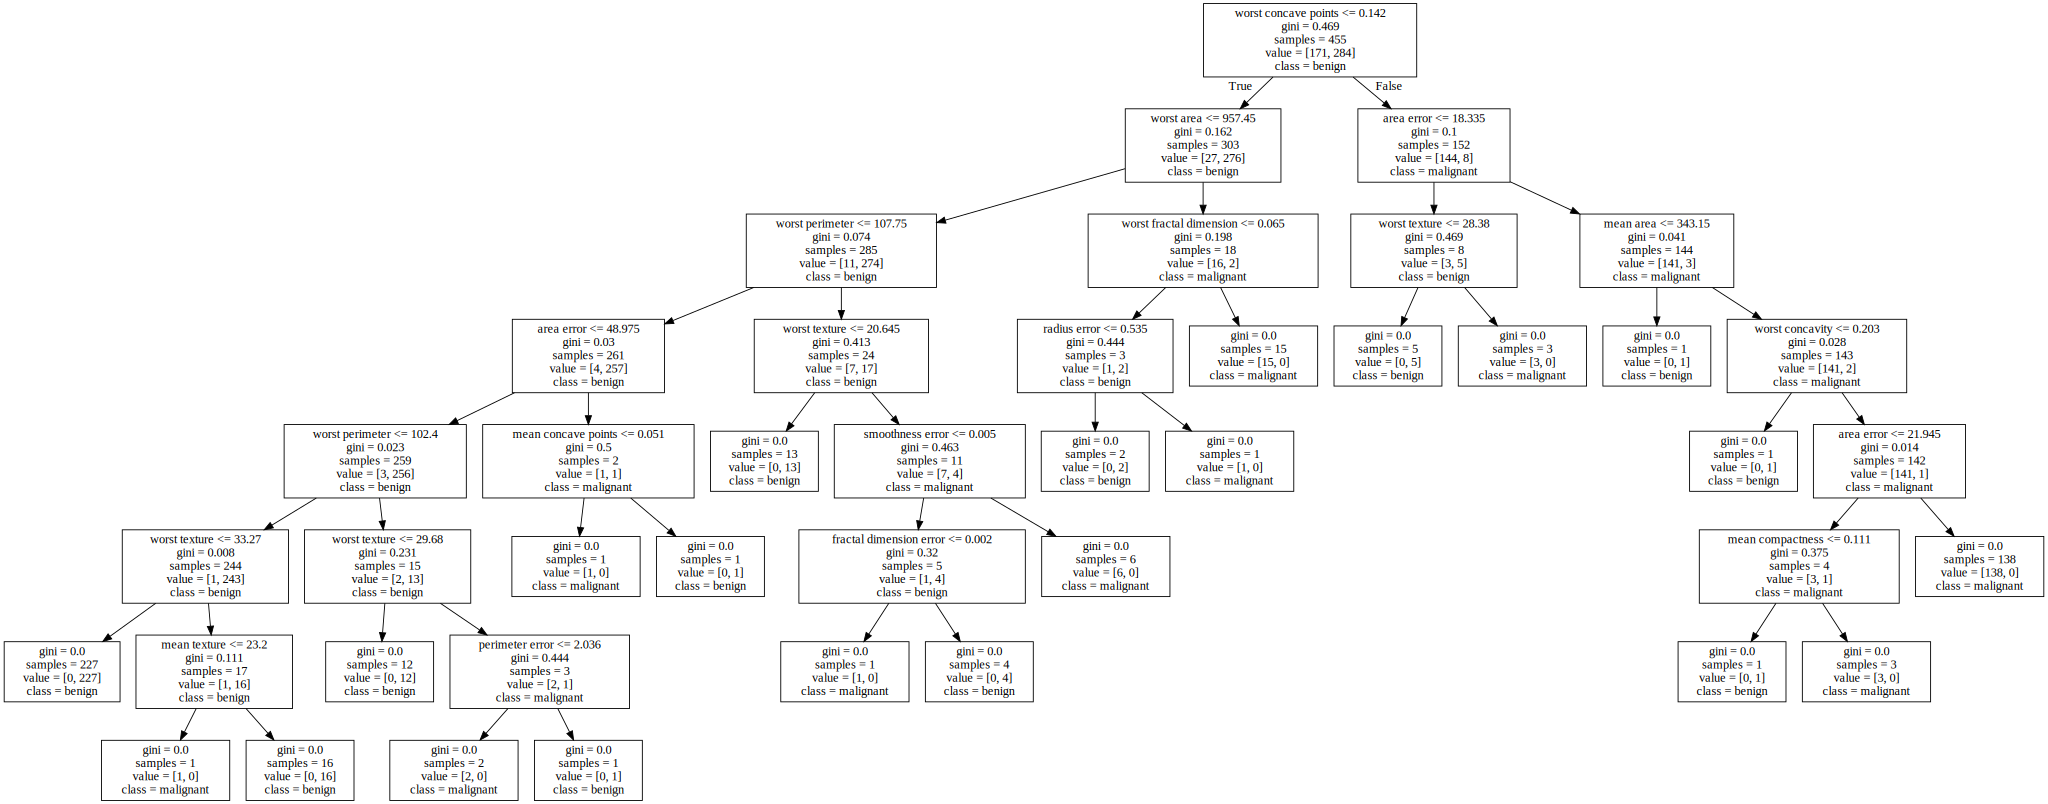

In [18]:
import graphviz
# Preprocessing of training data, fit model 
clf.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_data = tree.export_graphviz(model, 
                  feature_names=[d for d in data.feature_names],  
                  class_names= [d for d in data.target_names])
graph = graphviz.Source(dot_data)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid_full)

graph

---
## Accuracy and F1 Score

In [19]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_valid, preds)
f1 = f1_score(y_valid, preds)
score_data = {'accuracy': accuracy, 'f1': f1}
score = pd.DataFrame(data = score_data, index=['score'])
score

,accuracy,f1
score,0.929825,0.943662
